In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import unicodedata

In [2]:

df = pd.read_csv('/kaggle/input/agendamentos/agendamentos.csv', sep=';')
df


,id,cliente,estúdio,profissional,horario,estilo de tatto,valor
0,1,joão da silva,INKLAB,MARIA GONÇALVES,14:30,Realismo,R$400
1,2,ANA CAROLINA,dark_ink,PEDRO M.,09:00,Old School,300reais
2,3,lucas p.,Studio Luz,marcela,16:00,Geométrico,R$ 250
3,4,roberta,INKLAB,joão,11:15,pontilhismo,200
4,5,Bruno,dark_ink,ALINE,13:00,Minimalista,"350,00"
5,6,camila,Studio Luz,Rafa,10h,lettering,"R$180,00"
6,7,Rafaela,INKLAB,Maria Gonçalves,15:45,old-school,quatrocentos
7,8,Tiago M.,Dark_Ink,aline,17:00,blackwork,R$420
8,9,Beatriz,Studio luz,Pedro M.,12:30,fine line,270.00
9,10,jessica,Inklab,Marcela,14h,Aquarela,R$390


In [3]:
numeros = {
    "300reais": 300, "quatrocentos":400
}

df["valor"] = df["valor"].apply(
lambda v: float(
    re.sub(",", ".", re.sub(r"[^\d,\.]", "", str(v)))
    )if pd.notna(v) and re.search(r"\d", str(v)) else
    float (numeros.get(
        ''.join(c for c in unicodedata.normalize('NFD', str(v).lower()) if unicodedata.category(c) != 'Mn'),
        float("nan")
    ))
)


In [4]:
df = df.apply(lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x))

df

,id,cliente,estúdio,profissional,horario,estilo de tatto,valor
0,1,joão da silva,INKLAB,MARIA GONÇALVES,14:30,Realismo,400.0
1,2,ANA CAROLINA,dark_ink,PEDRO M.,09:00,Old School,300.0
2,3,lucas p.,Studio Luz,marcela,16:00,Geométrico,250.0
3,4,roberta,INKLAB,joão,11:15,pontilhismo,200.0
4,5,Bruno,dark_ink,ALINE,13:00,Minimalista,350.0
5,6,camila,Studio Luz,Rafa,10h,lettering,180.0
6,7,Rafaela,INKLAB,Maria Gonçalves,15:45,old-school,400.0
7,8,Tiago M.,Dark_Ink,aline,17:00,blackwork,420.0
8,9,Beatriz,Studio luz,Pedro M.,12:30,fine line,270.0
9,10,jessica,Inklab,Marcela,14h,Aquarela,390.0


In [5]:
df["cliente"] = df["cliente"].str.title()
df["estúdio"] = df["estúdio"].str.title()
df["profissional"] = df["profissional"].str.title()
df

,id,cliente,estúdio,profissional,horario,estilo de tatto,valor
0,1,João Da Silva,Inklab,Maria Gonçalves,14:30,Realismo,400.0
1,2,Ana Carolina,Dark_Ink,Pedro M.,09:00,Old School,300.0
2,3,Lucas P.,Studio Luz,Marcela,16:00,Geométrico,250.0
3,4,Roberta,Inklab,João,11:15,pontilhismo,200.0
4,5,Bruno,Dark_Ink,Aline,13:00,Minimalista,350.0
5,6,Camila,Studio Luz,Rafa,10h,lettering,180.0
6,7,Rafaela,Inklab,Maria Gonçalves,15:45,old-school,400.0
7,8,Tiago M.,Dark_Ink,Aline,17:00,blackwork,420.0
8,9,Beatriz,Studio Luz,Pedro M.,12:30,fine line,270.0
9,10,Jessica,Inklab,Marcela,14h,Aquarela,390.0


In [6]:
def padronizar_horario(valor):
    if pd.isna(valor):
        return None
    valor = str(valor).strip().lower()
    match = re.match(r'(\d{1,2})h$', valor)  # ex: "14h" ou "10h"
    if match:
        hora = int(match.group(1))
        return f'{hora:02d}:00'
    match2 = re.match(r'^\d{1,2}:\d{2}$', valor)  # ex: "14:30"
    if match2:
        return valor
    return None

df['horario'] = df['horario'].apply(padronizar_horario)
df

,id,cliente,estúdio,profissional,horario,estilo de tatto,valor
0,1,João Da Silva,Inklab,Maria Gonçalves,14:30,Realismo,400.0
1,2,Ana Carolina,Dark_Ink,Pedro M.,09:00,Old School,300.0
2,3,Lucas P.,Studio Luz,Marcela,16:00,Geométrico,250.0
3,4,Roberta,Inklab,João,11:15,pontilhismo,200.0
4,5,Bruno,Dark_Ink,Aline,13:00,Minimalista,350.0
5,6,Camila,Studio Luz,Rafa,10:00,lettering,180.0
6,7,Rafaela,Inklab,Maria Gonçalves,15:45,old-school,400.0
7,8,Tiago M.,Dark_Ink,Aline,17:00,blackwork,420.0
8,9,Beatriz,Studio Luz,Pedro M.,12:30,fine line,270.0
9,10,Jessica,Inklab,Marcela,14:00,Aquarela,390.0


In [7]:
df["estilo de tatto"] = df["estilo de tatto"].str.replace(r"[^a-z ]", "", regex=True)
df["estilo de tatto"] = df["estilo de tatto"].str.title()
df

,id,cliente,estúdio,profissional,horario,estilo de tatto,valor
0,1,João Da Silva,Inklab,Maria Gonçalves,14:30,Ealismo,400.0
1,2,Ana Carolina,Dark_Ink,Pedro M.,09:00,Ld Chool,300.0
2,3,Lucas P.,Studio Luz,Marcela,16:00,Eomtrico,250.0
3,4,Roberta,Inklab,João,11:15,Pontilhismo,200.0
4,5,Bruno,Dark_Ink,Aline,13:00,Inimalista,350.0
5,6,Camila,Studio Luz,Rafa,10:00,Lettering,180.0
6,7,Rafaela,Inklab,Maria Gonçalves,15:45,Oldschool,400.0
7,8,Tiago M.,Dark_Ink,Aline,17:00,Blackwork,420.0
8,9,Beatriz,Studio Luz,Pedro M.,12:30,Fine Line,270.0
9,10,Jessica,Inklab,Marcela,14:00,Quarela,390.0


In [8]:
contagem_estudios = df['estúdio'].value_counts()
contagem_estudios

estúdio
Inklab        4
Dark_Ink      3
Studio Luz    3
Name: count, dtype: int64

Text(0, 0.5, '')

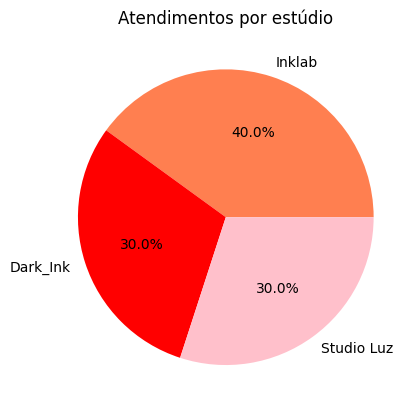

In [9]:
contagem_estudios = df['estúdio'].value_counts()
ax = contagem_estudios.plot(kind='pie', colors=['coral', 'red', 'pink'], autopct='%1.1f%%')
ax.set_title("Atendimentos por estúdio")
ax.set_ylabel('')

In [10]:
df

,id,cliente,estúdio,profissional,horario,estilo de tatto,valor
0,1,João Da Silva,Inklab,Maria Gonçalves,14:30,Ealismo,400.0
1,2,Ana Carolina,Dark_Ink,Pedro M.,09:00,Ld Chool,300.0
2,3,Lucas P.,Studio Luz,Marcela,16:00,Eomtrico,250.0
3,4,Roberta,Inklab,João,11:15,Pontilhismo,200.0
4,5,Bruno,Dark_Ink,Aline,13:00,Inimalista,350.0
5,6,Camila,Studio Luz,Rafa,10:00,Lettering,180.0
6,7,Rafaela,Inklab,Maria Gonçalves,15:45,Oldschool,400.0
7,8,Tiago M.,Dark_Ink,Aline,17:00,Blackwork,420.0
8,9,Beatriz,Studio Luz,Pedro M.,12:30,Fine Line,270.0
9,10,Jessica,Inklab,Marcela,14:00,Quarela,390.0
